In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('crime_data.csv')
print(len(df))
df.drop(columns=["Unnamed: 0"], inplace=True)
df = df.replace(to_replace=r"AM", value="", regex=True)
df = df.replace(to_replace=r"PM", value="", regex=True)
df = df.replace(to_replace=r"Blk ", value="", regex=True)
df["Time_of_Incident"] = df["Time_of_Incident"].apply(pd.to_datetime, errors="coerce")
df["Time_of_report"] = df["Time_of_report"].apply(pd.to_datetime, errors="coerce")
df["Time_of_Incident"] = df["Time_of_Incident"].apply(pd.to_datetime, errors="coerce", utc=True)
df = df.dropna()
print(len(df))

1794
1794


In [3]:
df['month_year'] = df['Time_of_Incident'].dt.to_period('M')

C:\Users\Anvi\AppData\Local\Temp\ipykernel_17996\1393748692.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['Time_of_Incident'].dt.to_period('M')


In [4]:
df

,Time_of_Incident,Time_of_report,Incident,Location,year,month,month_year
0,2016-01-08 07:00:00+00:00,2016-12-20,Sex Offense,7100 Preinkert Drive,2016,12,2016-01
1,2016-01-21 04:00:00+00:00,2017-03-03,Vandalism,South Campus Commons,2017,3,2016-01
2,2016-01-22 18:00:00+00:00,2017-03-03,Alcohol Violation,Wicomico Hall,2017,3,2016-01
3,2016-01-22 20:54:00+00:00,2017-03-03,Alcohol Violation,Easton Hall,2017,3,2016-01
4,2016-01-22 21:00:00+00:00,2017-03-03,Alcohol Violation,Ellicott Hall,2017,3,2016-01
...,...,...,...,...,...,...,...
1789,2023-09-29 18:00:00+00:00,2023-10-12,Theft From Auto,4200 Knox Road,2023,10,2023-09
1790,2023-10-01 12:00:00+00:00,2023-10-12,Theft From Auto,4300 Calvert Road,2023,10,2023-10
1791,2023-10-06 05:37:00+00:00,2023-10-12,Theft From Auto,9000 Baltimore Avenue,2023,10,2023-10
1792,2023-10-06 23:00:00+00:00,2023-10-12,Theft From Auto,4300 Hartwick Road,2023,10,2023-10


In [5]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Top 20 Incidents'}, xlabel='Count', ylabel='Incident'>

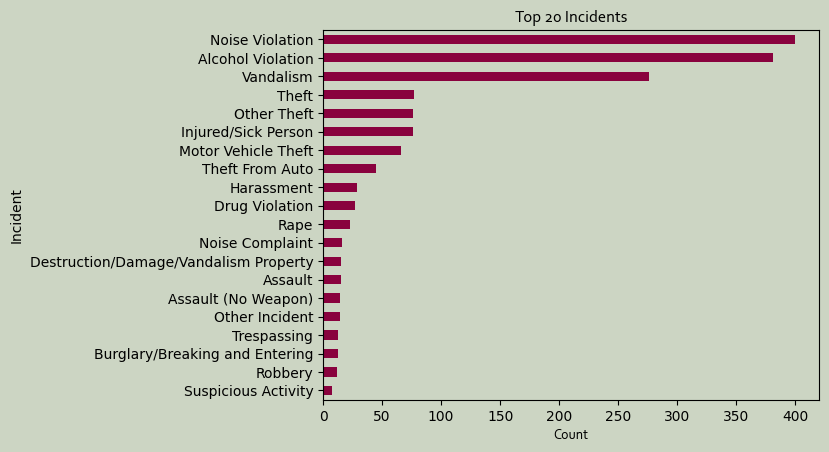

In [6]:
csfont = {'fontname':'Corbel'}
hfont = {'fontname':'Corbel'}
plt.figure(facecolor='#CCD5C3')
ax = plt.axes()
ax.set_facecolor("#CCD5C3")
plt.title('title',**csfont)
plt.xlabel('xlabel', **hfont)
df["Incident"].value_counts()[:20][::-1].plot(kind="barh", rot=0, xlabel="Count", title="Top 20 Incidents", color=['#89023E'])

In [7]:
df.drop(columns=["year", "month"], inplace=True)

In [8]:
groups = df.groupby(['Incident'])

In [9]:
top_n = df["Incident"].value_counts()[:5]
top_n_list = list(top_n.index)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


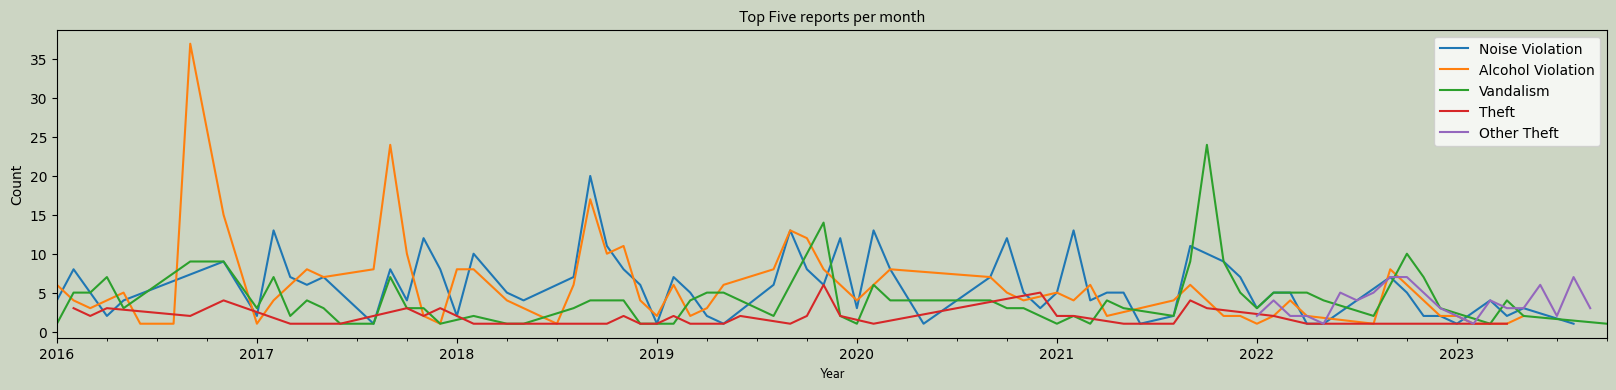

In [10]:
fig, ax = plt.subplots(figsize=(20,4))
csfont = {'fontname':'Corbel'}
hfont = {'fontname':'Corbel'}
plt.title('Top Five reports per month',**csfont)
plt.legend()
plt.ylabel("Count")
for incident in top_n_list:
    fig.set_facecolor("#CCD5C3")
    ax.set_facecolor("#CCD5C3") 
    data = groups.get_group(incident)["month_year"]
    freq = data.value_counts().sort_index()
    temp = freq.plot(label=incident)
    plt.xlabel('Year', **hfont)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


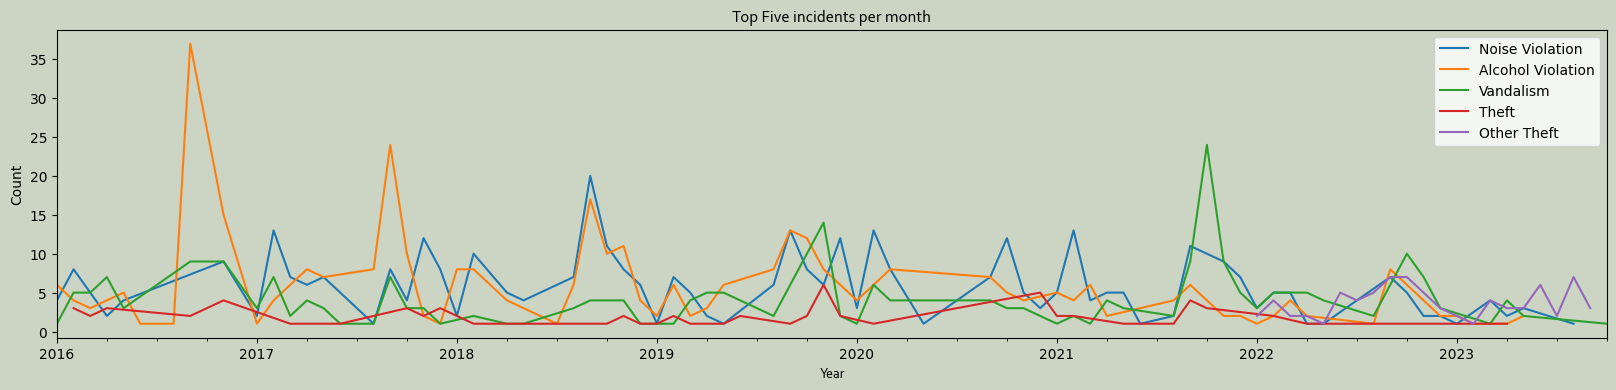

In [11]:
fig, ax = plt.subplots(figsize=(20,4))
csfont = {'fontname':'Corbel'}
hfont = {'fontname':'Corbel'}
plt.title('Top Five incidents per month',**csfont)
plt.legend()
plt.ylabel("Count")
for incident in top_n_list:
    fig.set_facecolor("#CCD5C3")
    ax.set_facecolor("#CCD5C3") 
    data = groups.get_group(incident)["month_year"]
    freq = data.value_counts().sort_index()
    temp = freq.plot(label=incident)
    plt.xlabel('Year', **hfont)
plt.legend()

In [12]:
df.to_csv("crime_data.csv")

In [13]:
import geopy as gp
from geopy.geocoders import Nominatim

loc = Nominatim(user_agent="Geopy Library")

In [14]:
top_10_assault = df[(df["Incident"] == "Aggravated Assault") | (df["Incident"] == "Assault")]["Location"].value_counts()[:10]

In [15]:
list(top_10_assault.index + " College Park Maryland")

['Elkton Hall College Park Maryland',
 'Denton Hall College Park Maryland',
 '4700 Harvard Road College Park Maryland',
 '8100 Baltimore Avenue College Park Maryland',
 '7200 Baltimore Avenue College Park Maryland',
 '4300 Metzerott Road College Park Maryland',
 '4600 College Avenue College Park Maryland',
 '7400 Princeton Ave College Park Maryland',
 '7300 Baltimore Ave College Park Maryland',
 'Courtyards Apartments College Park Maryland']

In [16]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(loc.geocode, min_delay_seconds=1)

In [22]:
#lat = []
#long = []
for i in top_10_assault.index[6:]:
    getLoc = loc.geocode(i)
    lat.append(getLoc.latitude)
    long.append(getLoc.longitude)
    print(i)

4600 College Avenue
7400 Princeton Ave
7300 Baltimore Ave
Courtyards Apartments


In [24]:
df["Lat"] = pd.DataFrame(lat)
df["Long"] = pd.DataFrame(long)

In [ ]:
pip install plotly.express

  Obtaining dependency information for plotly>=4.1.0 from https://files.pythonhosted.org/packages/df/79/c80174d711ee26ee5da55a9cc3e248f1ec7a0188b5e4d6bbbbcd09b974b0/plotly-5.17.0-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.2 MB 1.1 MB/s eta 0:00:09
     - -------------------------------------- 0.4/9.2 MB 4.6 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/9.2 MB 5.0 MB/s eta 0:00:02
     ---- ----------------------------------- 1.1/9.2 MB 5.6 MB/s eta 0:00:02
     ----- ---------------------------------- 1.3/9.2 MB 5.4 MB/s eta 0:00:02
     ------- -------------------------------- 1.6/9.2 MB 5.8 MB/s eta 0:00:02
     -------- ------------------------------- 2.0/9.2 MB 5.9 MB/s eta 0:00:02
     --------- ------------------------------ 2.2/9.2 MB 5.9 MB/s eta 0:00:02
     ---------- ----------------------------- 2.5/9.2 MB 5.9 MB/s eta 0:00:02
     ------------ 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Anvi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [30]:
#import plotly.express as px
fig = px.scatter_mapbox(df, 
                        lat="Lat", 
                        lon="Long", 
                        zoom=8, 
                        height=800,
                        width=800,)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['Time_of_Incident', 'Time_of_report', 'Incident', 'Location', 'month_year', 'Lat', 'Long'] but received: Listed

In [ ]:
df["lat_lon"] = df["Location"].apply(lambda x: loc.geocode(x))

GeocoderTimedOut: Service timed out

In [ ]:
temp = df["Time_of_report"].dt.date - df["Time_of_Incident"].dt.date

In [ ]:
temp.value_counts()

17 days     67
18 days     53
32 days     51
31 days     50
25 days     49
            ..
338 days     1
296 days     1
288 days     1
283 days     1
70 days      1
Name: count, Length: 328, dtype: int64

In [ ]:
df

,Time_of_Incident,Time_of_report,Incident,Location,month_year
0,2016-01-08 07:00:00+00:00,2016-12-20,Sex Offense,7100 Blk Preinkert Drive,2016-01
1,2016-01-21 04:00:00+00:00,2017-03-03,Vandalism,South Campus Commons,2016-01
2,2016-01-22 18:00:00+00:00,2017-03-03,Alcohol Violation,Wicomico Hall,2016-01
3,2016-01-22 20:54:00+00:00,2017-03-03,Alcohol Violation,Easton Hall,2016-01
4,2016-01-22 21:00:00+00:00,2017-03-03,Alcohol Violation,Ellicott Hall,2016-01
...,...,...,...,...,...
1789,2023-09-29 18:00:00+00:00,2023-10-12,Theft From Auto,4200 Blk Knox Road,2023-09
1790,2023-10-01 12:00:00+00:00,2023-10-12,Theft From Auto,4300 Blk Calvert Road,2023-10
1791,2023-10-06 05:37:00+00:00,2023-10-12,Theft From Auto,9000 Blk Baltimore Avenue,2023-10
1792,2023-10-06 23:00:00+00:00,2023-10-12,Theft From Auto,4300 Blk Hartwick Road,2023-10
